<a href="https://colab.research.google.com/github/ramkumar997/Data_Science/blob/main/Business%20case/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
#reading CSV
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

# **Defining Problem Statement and Analyzing basic metrics (10 Points)**

**1.1-Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#shape of data
df.shape

(550068, 10)

In [ ]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**1.2-Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
#unique userID
print("Unique user id:",df['User_ID'].nunique())

Unique user id: 5891


In [ ]:
#unique product ID
print("Unique product ID:",df['Product_ID'].nunique())

Unique product ID: 3631


In [ ]:
#Gender Count
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
#Age value count
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
#Occupation value count
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
#city category count
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
#stay year count
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
#Marital status count
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
#Product category count
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

**1.2-Visual Analysis - Univariate & Bivariate**

<Axes: xlabel='City_Category', ylabel='count'>

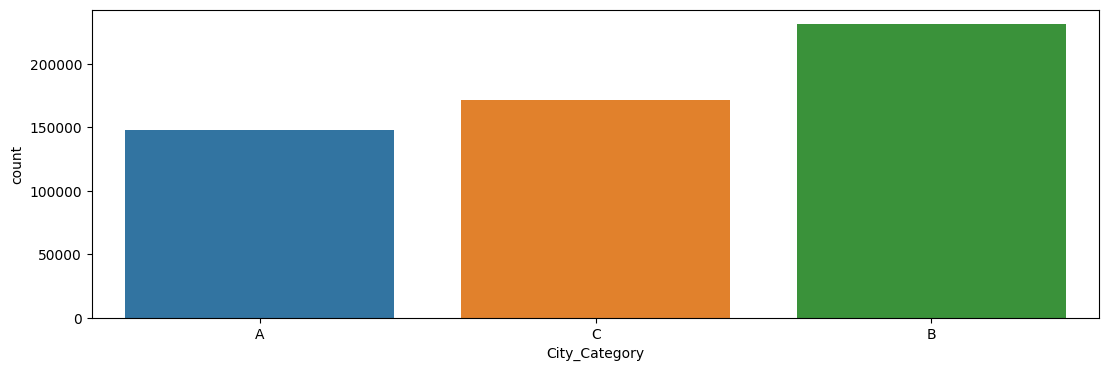

In [ ]:
#univariate
plt.figure(figsize=(13, 4))
sns.countplot(data=df,x="City_Category")

<Axes: xlabel='Age', ylabel='Count'>

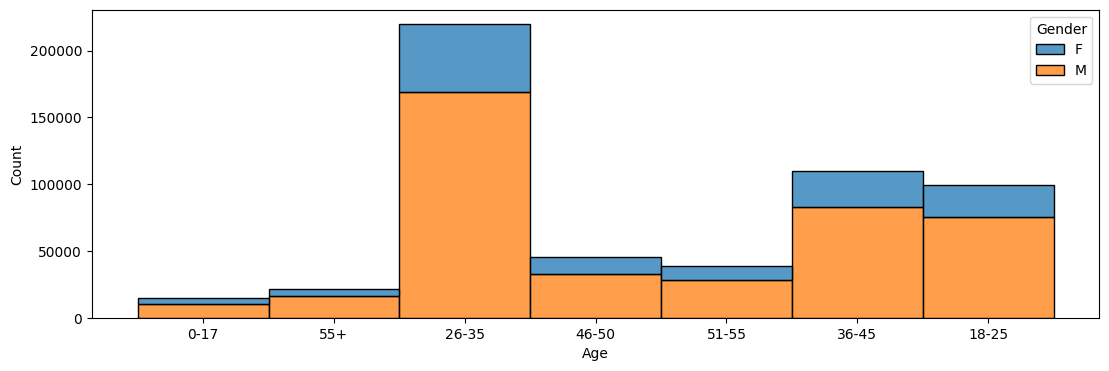

In [ ]:
#Age vs gender
plt.figure(figsize=(13, 4))
sns.histplot(data=df,x="Age",hue="Gender",binwidth=1,multiple="stack")

<Axes: xlabel='Occupation', ylabel='Count'>

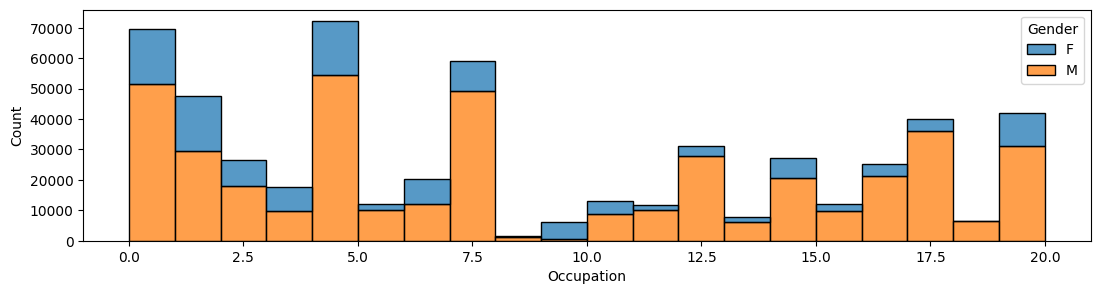

In [ ]:
#Occupation vs gender
plt.figure(figsize=(13, 3))
sns.histplot(data=df,x="Occupation",hue="Gender",binwidth=1,multiple="stack")

<Axes: xlabel='Product_Category', ylabel='count'>

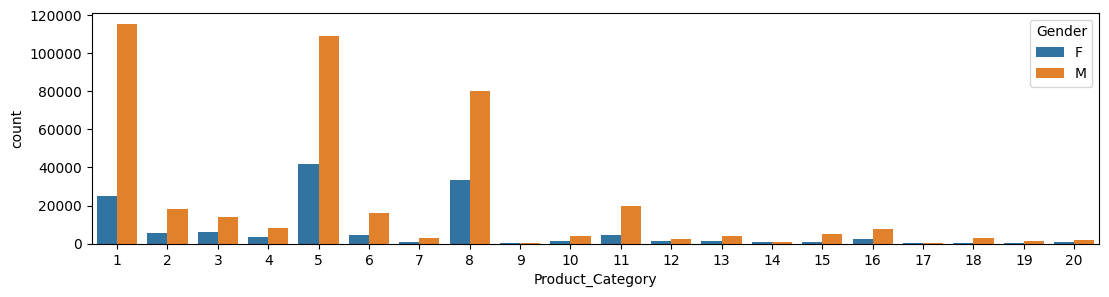

In [ ]:
#Occupation vs gender
plt.figure(figsize=(13, 3))
sns.countplot(data=df,x="Product_Category",hue="Gender")

<Axes: xlabel='Purchase', ylabel='Gender'>

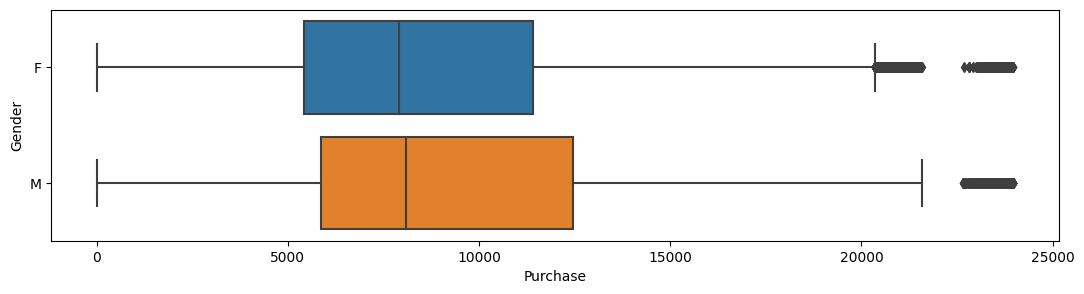

In [ ]:
#Bivariate
#Gender vs Purchase
plt.figure(figsize=(13, 3))
sns.boxplot(data=df,x="Purchase",y='Gender')

<ipython-input-24-ac5b29c418b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".1f")


<Axes: >

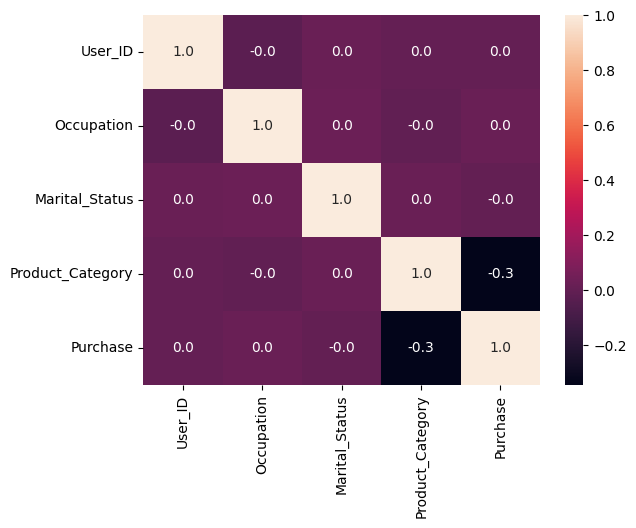

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True,fmt=".1f")

<ipython-input-25-3f5531ef4b2b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


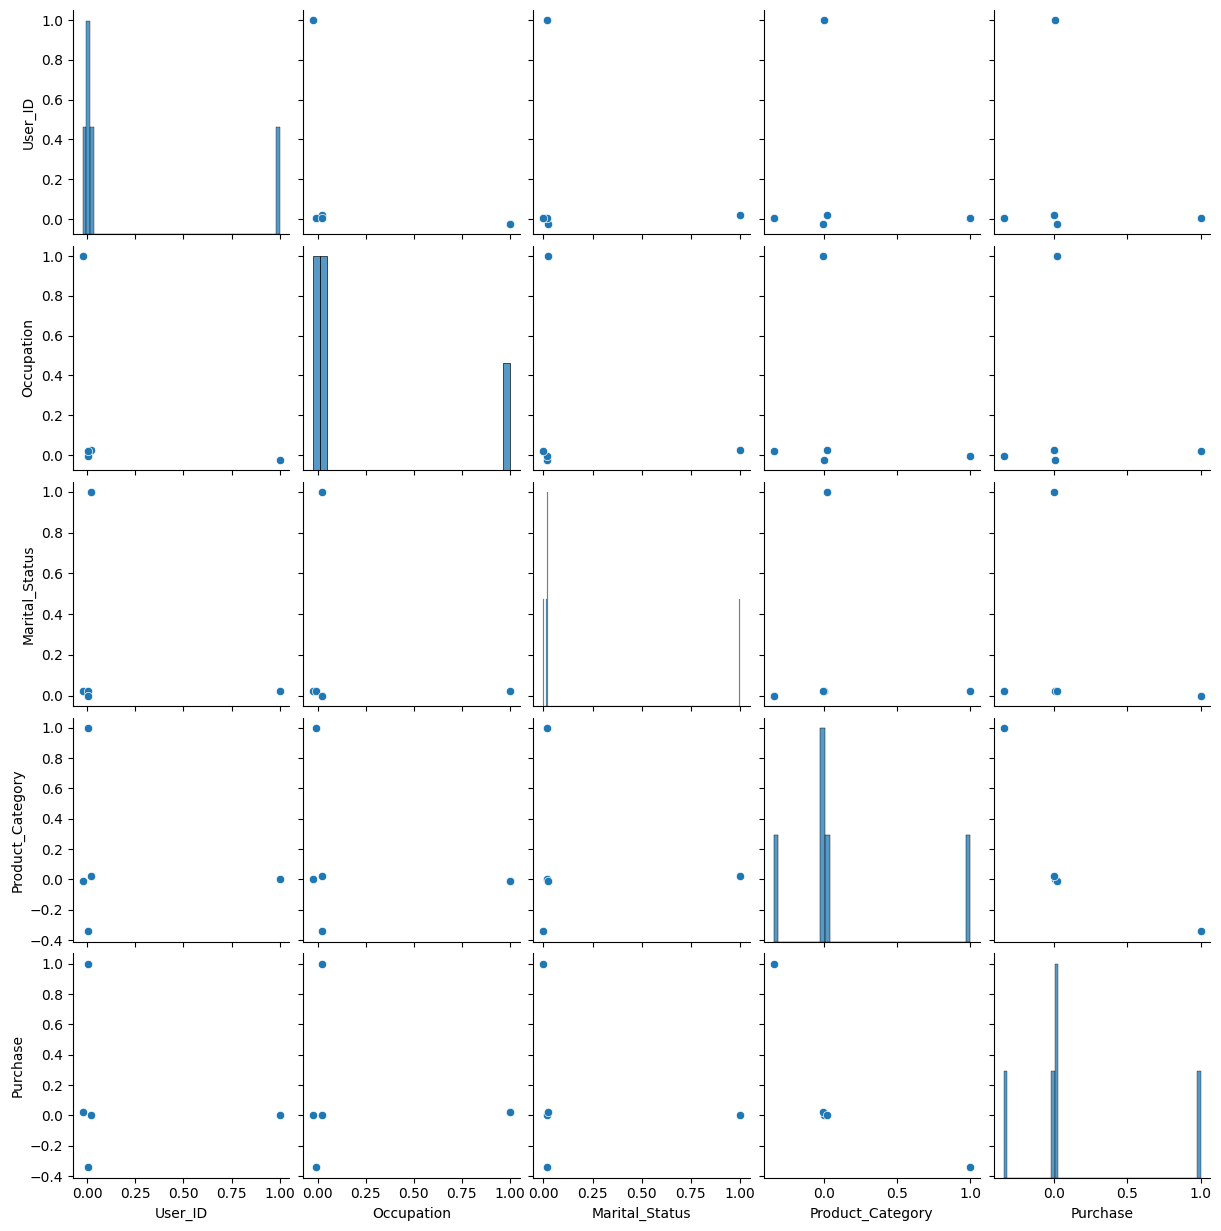

In [ ]:
#pairplot
sns.pairplot(df.corr())

# **Data Profiling:**

1. Male count is high compared to females with ratio of 3:1
2. Most of the purchases are on the age 26-35
3. Most chosen occupation is "4" and less chosen is "8"
4. City "B" has the highest purchases.
5. Majority of people tend to live for 1 year in a city.
6. Unmarried people are high compared married with ratio of 1.44:1
7. 20 different products are there with 5th category being the most purchased.
8. Both Male and Female have outliers in purchases
9. Product category 1-8 corresponds to approx 50% of the total purchases

In [ ]:
# Female Purchase data and summary
df.loc[df['Gender'] == 'M',['Purchase']].describe()

,Purchase
count,414259.00000
mean,9437.52604
std,5092.18621
min,12.00000
25%,5863.00000
50%,8098.00000
75%,12454.00000
max,23961.00000


In [ ]:
# Male Purchase data and summary
df.loc[df['Gender'] == 'F',['Purchase']].describe()

,Purchase
count,135809.000000
mean,8734.565765
std,4767.233289
min,12.000000
25%,5433.000000
50%,7914.000000
75%,11400.000000
max,23959.000000


**Insights**: The average purchase of male is higher than female

# **Z-Scores of purchases**

In [ ]:
Female_Purchase=df.loc[df['Gender'] == 'F',['Purchase']]
male_Purchase=df.loc[df['Gender'] == 'M',['Purchase']]

In [ ]:
def hist(data,n,num):
  mean_f=[]
  for i in range(num):
    sample=data['Purchase'].sample(n).mean()
    mean_f.append(sample)
  f_mean=np.mean(mean_f)
  f_std=np.std(mean_f)
  f_pmean=data['Purchase'].mean()
  f_pcount=data['Purchase'].count()
  Z_f=(f_mean-f_pmean)/(f_std/(f_pcount**0.5))
  return Z_f

In [ ]:
#Z score of sample mean of female data
hist(Female_Purchase,100,10000)

5.031444472008759

In [ ]:
norm.cdf(5.031444472008759)

0.9999997566009456

In [ ]:
# Z score of sample mean of male data
hist(male_Purchase,100,10000)

0.7878286816374639

In [ ]:
norm.cdf(0.7878286816374639)

0.7846015390640189

# **Confidence intervals of purchases**

In [ ]:
def CI(data1,data2,n,m):
  Female_U_CI=(data1['Purchase'].mean())+((n)*(data1['Purchase'].std())/((data1['Purchase'].count())**0.5))
  Female_L_CI=(data1['Purchase'].mean())-((n)*(data1['Purchase'].std())/((data1['Purchase'].count())**0.5))
  Male_U_CI=(data2['Purchase'].mean())+((n)*(data2['Purchase'].std())/((data2['Purchase'].count())**0.5))
  Male_L_CI=(data2['Purchase'].mean())-((n)*(data2['Purchase'].std())/((data2['Purchase'].count())**0.5))
  print("The {:}% confidence interval of male purchase: {:.4f} to {:.4f}".format(m,Male_L_CI, Male_U_CI))
  print("The {:}% confidence interval of female purchase: {:.4f} to {:.4f}".format(m,Female_L_CI, Female_U_CI))

In [ ]:
#90% interval
CI(Female_Purchase,male_Purchase,1.645,90)

The 90% confidence interval of male purchase: 9424.5113 to 9450.5407
The 90% confidence interval of female purchase: 8713.2859 to 8755.8456


In [ ]:
#95% interval
CI(Female_Purchase,male_Purchase,1.96,95)

The 95% confidence interval of male purchase: 9422.0192 to 9453.0329
The 95% confidence interval of female purchase: 8709.2111 to 8759.9204


In [ ]:
#99% interval
CI(Female_Purchase,male_Purchase,2.576,99)

The 99% confidence interval of male purchase: 9417.1456 to 9457.9065
The 99% confidence interval of female purchase: 8701.2425 to 8767.8891


**Insights**: By checking the above confidence intervals, we see that male and female intervals do not overlap entirely

99% the mean purchase value is between 9417.1456 to 9457.9065 for male and from 8701.2425 to 8767.8891 for females

# **Married vs Unmarried**

In [ ]:
# Unmarried Purchase data and summary
#considering 0 as Unmarried
df.loc[df['Marital_Status'] == 0,['Purchase']].describe()

,Purchase
count,324731.000000
mean,9265.907619
std,5027.347859
min,12.000000
25%,5605.000000
50%,8044.000000
75%,12061.000000
max,23961.000000


In [ ]:
#Married Purchase data and summary
#considering 1 as Married
df.loc[df['Marital_Status'] == 1,['Purchase']].describe()

,Purchase
count,225337.000000
mean,9261.174574
std,5016.897378
min,12.000000
25%,5843.000000
50%,8051.000000
75%,12042.000000
max,23961.000000


In [ ]:
Unmarried_Purchase=df.loc[df['Marital_Status'] == 0,['Purchase']]
Married_Purchase=df.loc[df['Marital_Status'] == 1,['Purchase']]

In [ ]:
#Z score of unmarried
hist(Unmarried_Purchase,100,10000)

-5.3848000301577255

In [ ]:
norm.cdf(-5.3848000301577255)

3.626261666534639e-08

In [ ]:
#Z score of married
hist(Married_Purchase,100,10000)

1.732375808748627

In [ ]:
norm.cdf(1.732375808748627)

0.9583966638494

**Confidence Interval of Married and Unmarried**

In [ ]:
#90%interval
CI(Unmarried_Purchase,Married_Purchase,1.645,90)

The 90% confidence interval of male purchase: 9243.7892 to 9278.5600
The 90% confidence interval of female purchase: 9251.3951 to 9280.4201


In [ ]:
#95%interval
CI(Unmarried_Purchase,Married_Purchase,1.96,95)

The 95% confidence interval of male purchase: 9240.4600 to 9281.8891
The 95% confidence interval of female purchase: 9248.6161 to 9283.1991


In [ ]:
#99%interval
CI(Unmarried_Purchase,Married_Purchase,2.576,99)

The 99% confidence interval of male purchase: 9233.9498 to 9288.3994
The 99% confidence interval of female purchase: 9243.1816 to 9288.6336


**Insights**:  We see the confidence intervals overlap each other under married column

# **Age**

In [ ]:
F0to17=df.loc[df['Age'].str.strip() =='0-17',['Purchase']]
F18T25=df.loc[df['Age'].str.strip() =='18-25',['Purchase']]
F26T35=df.loc[df['Age'].str.strip() =='26-35',['Purchase']]
F36T45=df.loc[df['Age'].str.strip() =='36-45',['Purchase']]
F46T50=df.loc[df['Age'].str.strip()=='46-50',['Purchase']]
F51T55=df.loc[df['Age'].str.strip()=='51-55',['Purchase']]
F55=df.loc[df['Age'].str.strip() =='55+',['Purchase']]

In [ ]:
def Age(n,m):
  for i in ('0-17','18-25','26-35','36-45','46-50','51-55','55+'):
    Age=df.loc[df['Age'].str.strip() ==i]
    Age_U=(Age['Purchase'].mean())-((n)*(Age['Purchase'].std())/((Age['Purchase'].count())**0.5))
    Age_L=(Age['Purchase'].mean())+((n)*(Age['Purchase'].std())/((Age['Purchase'].count())**0.5))
    print("The {}% confidence interval of Age {}: {:.4f} to {:.4f}".format(m,i,Age_U, Age_L))

# **Confidence intervals on Age**

In [ ]:
#90%interval
Age(1.645,90)

The 90% confidence interval of Age 0-17: 8865.0476 to 9001.8817
The 90% confidence interval of Age 18-25: 9143.4307 to 9195.8965
The 90% confidence interval of Age 26-35: 9235.1014 to 9270.2798
The 90% confidence interval of Age 36-45: 9306.4392 to 9356.2622
The 90% confidence interval of Age 46-50: 9170.4035 to 9246.8479
The 90% confidence interval of Age 51-55: 9492.1576 to 9577.4584
The 90% confidence interval of Age 55+: 9280.0627 to 9392.4982


In [ ]:
#95%interval
Age(1.96,95)

The 95% confidence interval of Age 0-17: 8851.9465 to 9014.9828
The 95% confidence interval of Age 18-25: 9138.4074 to 9200.9198
The 95% confidence interval of Age 26-35: 9231.7333 to 9273.6480
The 95% confidence interval of Age 36-45: 9301.6689 to 9361.0325
The 95% confidence interval of Age 46-50: 9163.0843 to 9254.1671
The 95% confidence interval of Age 51-55: 9483.9905 to 9585.6255
The 95% confidence interval of Age 55+: 9269.2976 to 9403.2633


In [ ]:
#99%interval
Age(2.576,99)

The 99% confidence interval of Age 0-17: 8826.3265 to 9040.6028
The 99% confidence interval of Age 18-25: 9128.5840 to 9210.7432
The 99% confidence interval of Age 26-35: 9225.1467 to 9280.2346
The 99% confidence interval of Age 36-45: 9292.3403 to 9370.3611
The 99% confidence interval of Age 46-50: 9148.7713 to 9268.4801
The 99% confidence interval of Age 51-55: 9468.0193 to 9601.5967
The 99% confidence interval of Age 55+: 9248.2458 to 9424.3151


# **Insights on Zscore an CI**

1. Z-Score of sample 100 data of female tells the mean is 99% far away from the mean and 78.4% away from mean for males.

2. Z-Score of sample 100 data of unmarried tells 30% away from mean for unmarried and 95% away from mean for married

3. The confidence interval of Female and male purchase do not overlap where married and umarried category overlap.

4. The confidence interval of ages 0-17, 26-35, 36-45 overlap each other.


# **Recommendations**

1. Since male purchase is more than female, wallmart should focus on female audience and provide more discounts of female centric products.

2. 5th category product is most purchased, so wallmart should focus on this to get more profit margin.

3. The confidence interval of ages between 0 to 45 overlap, wallmart should focus on these ages and display product according to it.